In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)
x

array([[-6.94238952e+00, -6.88072230e+00],
       [ 8.14492336e+00,  7.52724561e+00],
       [-3.61995355e+00, -7.72691339e-02],
       [-8.91918262e+00, -6.77218900e+00],
       [-7.37151112e+00, -5.05064290e+00],
       [-4.65743008e+00,  5.07750808e-02],
       [-9.85614721e+00, -1.94829844e+00],
       [-7.03064028e+00, -7.47212242e+00],
       [ 7.44598269e+00,  9.20313614e+00],
       [-6.74761638e+00, -5.40793452e+00],
       [ 8.73872704e+00,  5.97009465e+00],
       [-3.89871930e+00,  1.52191932e-01],
       [ 8.84851188e+00,  9.26501008e+00],
       [-6.83038032e+00, -7.68741713e+00],
       [-4.65780461e+00,  5.13396635e-01],
       [-9.14747586e+00, -5.83583269e+00],
       [ 8.27287322e+00,  6.92062212e+00],
       [-6.67147607e+00, -5.89031942e+00],
       [-7.33837507e+00, -5.96439930e+00],
       [ 6.96905011e+00,  6.34491640e+00],
       [ 1.87879015e+00,  3.51452443e+00],
       [ 1.46173901e+00,  3.38024741e+00],
       [-7.82304106e+00, -6.34230341e+00],
       [-3.

In [4]:
y

array([3, 2, 1, 3, 3, 1, 4, 3, 2, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 2, 0, 0,
       3, 1, 3, 0, 4, 4, 1, 4, 3, 4, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 4, 4,
       1, 2, 2, 1, 4, 4, 2, 3, 4, 3, 3, 0, 3, 3, 2, 1, 2, 1, 1, 3, 4, 2,
       1, 1, 0, 1, 0, 3, 0, 3, 0, 1, 3, 4, 0, 0, 1, 0, 1, 4, 2, 4, 1, 2,
       4, 1, 4, 0, 3, 0, 0, 2, 3, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 3,
       2, 4, 3, 2, 1, 0, 2, 4, 0, 1, 2, 1, 4, 3, 0, 4, 4, 4, 3, 3, 1, 1,
       3, 2, 2, 4, 1, 4, 1, 3, 3, 0, 1, 2, 4, 3, 2, 2, 3, 1, 3, 3, 1, 1,
       2, 0, 0, 4, 1, 3, 0, 2, 4, 0, 2, 0, 2, 0, 0, 0, 4, 3, 0, 2, 0, 4,
       3, 1, 2, 4, 2, 3, 2, 0, 4, 4, 0, 3, 1, 2, 0, 1, 4, 3, 4, 0, 1, 4,
       3, 3, 3, 0, 0, 2, 3, 4, 4, 3, 2, 3, 3, 3, 0, 2, 1, 2, 3, 3, 2, 4,
       1, 4, 4, 0, 3, 1, 3, 1, 4, 0, 1, 1, 3, 0, 3, 0, 1, 2, 1, 0, 0, 2,
       3, 3, 1, 1, 0, 2, 0, 3, 4, 2, 4, 3, 4, 4, 4, 4, 2, 0, 2, 3, 0, 2,
       4, 1, 2, 2, 2, 4, 3, 3, 1, 0, 0, 2, 1, 1, 3, 1, 4, 1, 2, 2, 4, 3,
       0, 4, 4, 2, 0, 3, 1, 0, 1, 4, 1, 1, 2, 3, 0,

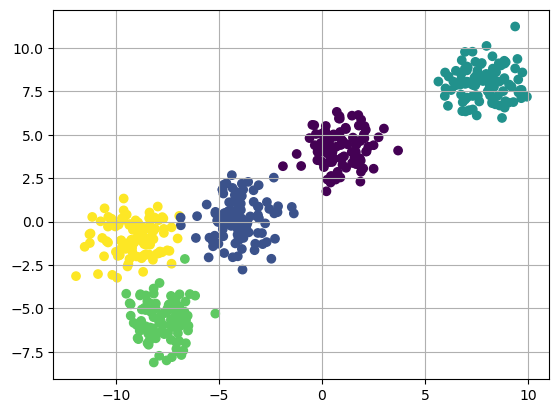

In [5]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
k = 5
colors = ["green","yellow","blue","cyan","red"]


In [16]:
random = 10*(2*np.random.random((x.shape[1],))-1)

In [17]:
random

array([-6.84530904,  0.74036027])

In [18]:
clusters = {}
for idx in range(k):
    center = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    cluster= {"center":center,"points" : [],"color" : colors[idx]}
    clusters[idx] = cluster

In [19]:
clusters

{0: {'center': array([3.66600243, 6.87973733]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.7970694 ,  2.61087994]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-9.65199589, -3.04972782]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 2.02830635, -3.6591197 ]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-1.18374317,  5.9906261 ]),
  'points': [],
  'color': 'red'}}

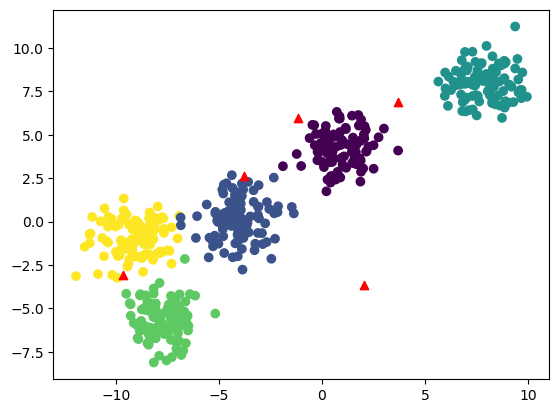

In [21]:
plt.scatter(x[:,0],x[:,1],c = y)
for i in clusters:
    center = clusters[i]["center"]
    plt.scatter(center[0],center[1],marker="^", c = "red")
plt.show()

In [22]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [29]:
#Implementing E step 
def assign_clusters():
    for idx in range(x.shape[0]):
        dist = []
        
        curr_x = x[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        
        
        
#Implementing the M-Step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis =0)
            clusters[idx]['center'] = new_center
            
            clusters[idx]['points'] = []
    
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try : 
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')

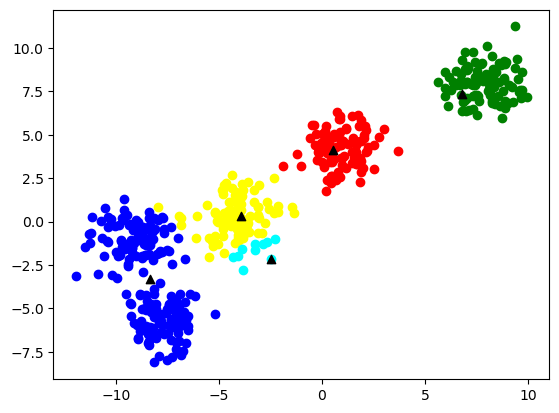

In [30]:
assign_clusters()
plot_clusters()
update_clusters()

In [31]:
from sklearn.cluster import KMeans

In [32]:
km = KMeans(n_clusters = 5)


In [33]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)


In [34]:
km.fit(X,y)


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [35]:
centers = km.cluster_centers_


In [36]:
labels = km.labels_


In [37]:
labels

array([0, 2, 3, 0, 0, 3, 4, 0, 2, 0, 2, 3, 2, 0, 3, 0, 2, 0, 0, 2, 1, 1,
       0, 3, 0, 1, 4, 4, 3, 4, 0, 4, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 4, 4,
       3, 2, 2, 4, 4, 4, 2, 0, 4, 0, 0, 1, 0, 0, 2, 3, 2, 3, 3, 0, 4, 2,
       3, 3, 1, 3, 1, 0, 1, 0, 1, 3, 0, 4, 1, 1, 3, 1, 3, 4, 2, 4, 3, 2,
       4, 3, 4, 1, 0, 1, 1, 2, 0, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 3, 3, 0,
       2, 4, 0, 2, 3, 1, 2, 4, 1, 3, 2, 3, 4, 0, 1, 4, 4, 4, 0, 0, 3, 3,
       0, 2, 2, 4, 3, 4, 3, 0, 0, 1, 3, 2, 4, 0, 2, 2, 0, 3, 0, 0, 3, 3,
       2, 1, 1, 4, 3, 0, 1, 2, 4, 1, 2, 1, 2, 1, 1, 1, 4, 0, 1, 2, 1, 4,
       0, 3, 2, 4, 2, 0, 2, 1, 4, 4, 1, 0, 3, 2, 1, 3, 4, 0, 4, 1, 3, 4,
       0, 0, 0, 1, 1, 2, 0, 4, 4, 0, 2, 0, 0, 0, 1, 2, 3, 2, 0, 0, 2, 4,
       3, 4, 4, 1, 0, 3, 0, 3, 4, 1, 3, 3, 0, 1, 0, 1, 3, 2, 3, 1, 1, 2,
       0, 0, 3, 3, 1, 2, 1, 0, 4, 2, 4, 0, 4, 4, 4, 4, 2, 1, 2, 0, 1, 2,
       4, 3, 2, 2, 2, 4, 0, 0, 3, 1, 1, 2, 3, 3, 0, 3, 4, 3, 2, 2, 4, 4,
       1, 4, 4, 2, 1, 0, 3, 1, 3, 4, 3, 3, 2, 0, 1,

TypeError: scatter() missing 1 required positional argument: 'y'

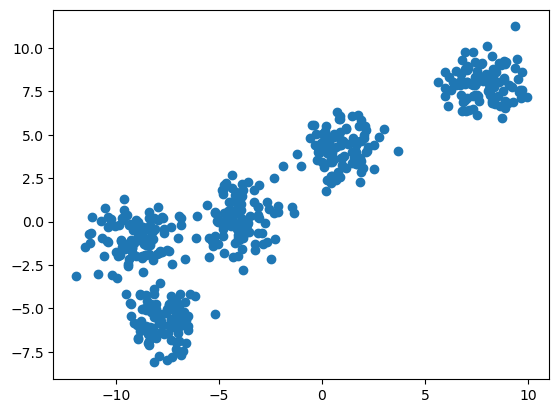

In [38]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0])
plt.show()